# Data 620 | Final Project

For our final project, we intend to import the tweets using tweepy to check how people is reacting about Trump Administration's handling for COVID-19. We will import the data first and then create sentiment analysis on that with reference to different aspects such as mask and hand sanitization policies, ventilations, travel bans, etc. We also want to create network analysis to find out the clusters from data. Although we wanted to import large enough dataset from twitter to come up with a reliable analysis but accessibility is an issue with twitter and we might not be able to get more than 1000 tweets. 

Group members:

In [22]:
# loading libraries
import tweepy
from tweepy import OAuthHandler
import networkx as nx
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import json
import nxviz as nv

Using tweepy we are going to extract the data regarding covid-19 from Trump Administration along with their replies from people in US. 

In [2]:
# Getting access to twitter
consumer_key = 'mT2zRRcMnlSiqkN130v2w8mCL'
consumer_secret = '0APlMqJY83HLC2opaBTi2wby0ONO3vApTeoc7Z2HMC3RuKJTGm'
access_token = '1013888021731643392-88W3ct7k8FcG0d1lfsM1O7m2gLsQN6'
access_secret = '8SpqLPEIHNYqihfCzkCOKPJukypUsN63CtdwOoYz14sxd'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
# Adding parameters
search_words = '#COVID OR #Corona OR #COVID-19'
#search_words = '#COVID'
date_since = "2019-12-01"


In [5]:
# Getting data
tweets = tweepy.Cursor(api.search,
                      q= search_words,
                      lang="en",
                      since= date_since).items(1000)
if tweets:
    print("Twitter is connected successfully")

Twitter is connected successfully


In [ ]:
# Converting the tweets into dataframe
#tweet_data = [[ "'" + str(tweet.id), tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]
#tweets_df = pd.DataFrame(data = tweet_data,
                        columns=['tweet_id', 'created_at', 'user', "location", "text"])
#tweets_df

In [6]:
# Converting the tweets into dataframe
tweet_data = [[tweet.user.screen_name, tweet.user.location, tweet.text] for tweet in tweets]
tweets_df = pd.DataFrame(data = tweet_data,
                        columns=['user', "location", "replies"])

# Extracting the user names of people who tweeted back 
tweets_df = tweets_df[tweets_df['replies'].str.contains("RT")]
tweets_df['replies'] = tweets_df['replies'].str.extract('([\\w @]+)')
tweets_df['replies'] = tweets_df['replies'].str.replace('RT ', '')
tweets_df['replies'] = tweets_df['replies'].str.replace('@', '')
tweets_df
tweets_df.head(20)

,user,location,replies
0,KINGCHRXS,OAKLAND x LA,marclamonthill
1,ayeeechrissay,"Oakland, CA",KTVU
2,HappaNarinder,"Jammu,J&K (India)",IndiaToday
3,juxtinsmile,his eyes,tubirfess
4,rvillarreal63,,dbongino
5,MaryAnnGreanier,Massachusetts,FacesOfCOVID
6,FiendsFreelance,"Brooklyn, NY",THECITYNY
7,nicaobias,Republic of the Philippines,theklmanuel
8,kathleenmaclay,"California, USA",SethAbramson
9,rodello437_,,drscott_atlanta


In [8]:
# Importing data into network using from_pandas_edgelist 
G_rt = nx.from_pandas_edgelist(tweets_df,
                              source= 'user',
                              target='replies',
                              create_using= nx.DiGraph())


In [9]:
# Calculating the nodes and edges
print("Total nodes are ", len(G_rt.nodes()))
print("Total edges are ", len(G_rt.edges()))

Total nodes are  1174
Total edges are  806


NodeView(('KINGCHRXS', 'marclamonthill', 'ayeeechrissay', 'KTVU', 'HappaNarinder', 'IndiaToday', 'juxtinsmile', 'tubirfess', 'rvillarreal63', 'dbongino', 'MaryAnnGreanier', 'FacesOfCOVID', 'FiendsFreelance', 'THECITYNY', 'nicaobias', 'theklmanuel', 'kathleenmaclay', 'SethAbramson', 'rodello437_', 'drscott_atlanta', 'Charpier', 'andrewbostom', 'heunoras', 'mhdksafa', 'bsadams25', 'dailytelegraph', 'waseemqadiri', 'vegix', 'spacecowgirl915', 'JagRobot', 'indoor_wildling', 'patriotpromise2', 'johncardillo', 'beaisabellec', 'CNN', 'mms5048', 'flajeffreyt', 'palafox_nancy', 'SB_CitySchools', '26aball', 'IRPlawyer', 'Karla70392275', 'omega_enigma', 'ProudSocialist', 'DetectiveFury', 'YungBoiNoctis', 'MelEHart', 'NYMag', 'houstontexasjoe', 'piperlauree', 'SourceAmericaUS', 'Pamela09479370', 'imvikas1718', 'Navrang', 'tomvail_tv', 'drdavidsamadi', 'fedupteacher1', 'LeoDaFlair', '_orabora', 'DianeLong22', 'Rparkerscience', 'wastingmytime59', 'rhonda_harbison', 'flapperdreams', 'Teri_Kanefield',

In [12]:
# Creating list of top influential nodes
cal = pd.DataFrame()
cal['n'] = nx.degree_centrality(G_rt).values()
cal.index = list(G_rt)
cal = cal.sort_values('n', ascending=False)
cal = cal.head(10)
print(cal)

# Dictionary of top 10 nodes
labels= {}
for node in G_rt.nodes():
    if node in cal.index:
        labels[node] = node

                        n
JudgeJeanine     0.044331
_orabora         0.035806
drdavidsamadi    0.028133
CNN              0.024723
kenklippenstein  0.021313
SethAbramson     0.021313
FacesOfCOVID     0.014493
UNICEF           0.011935
johncardillo     0.010230
mhdksafa         0.010230


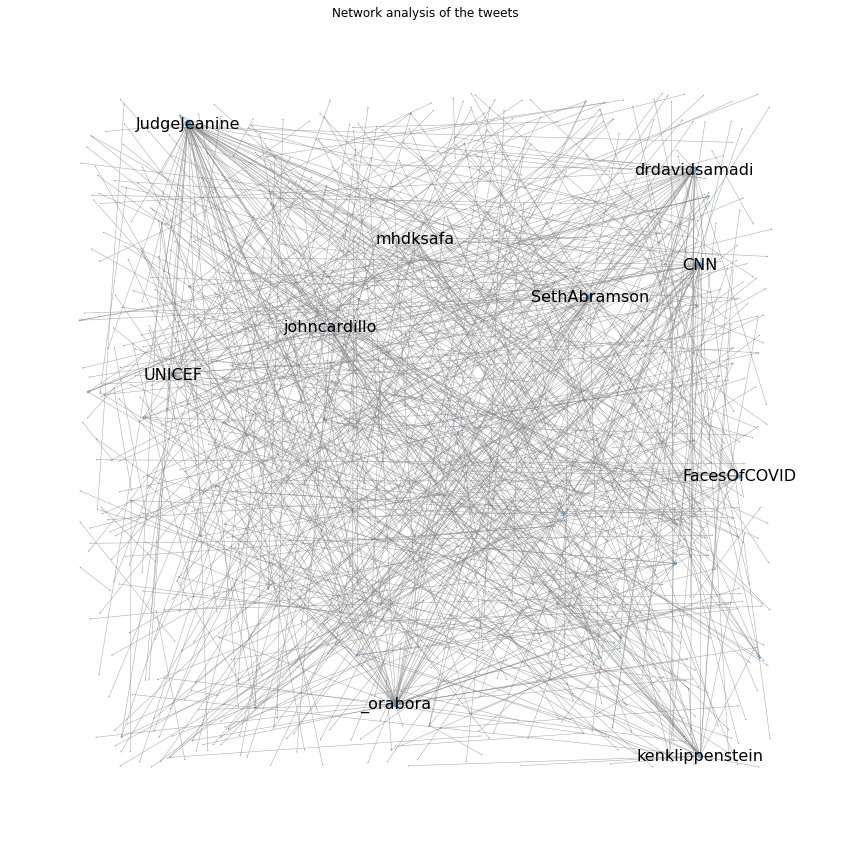

In [27]:
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1] for x in G_rt.degree()]

# Draw metwork
plt.figure(figsize=(15,15))
nx.draw_networkx(G_rt, pos,
                 with_labels=False,
                 node_size= sizes,
                 width=0.5, 
                 alpha=0.7,
                 arrowsize=1,
                 linewidths=0.1,
                 edge_color='Gray', seed=2)
nx.draw_networkx_labels(G_rt, pos, labels, font_size=16, font_color='black')
plt.title('Network analysis of the tweets')
plt.axis('off');plt.show()


In [18]:
# Calculations

# Creating dataframe with calculations
cal = pd.DataFrame()
cal['eigen_centrality'] = nx.eigenvector_centrality(G_rt).values()
cal['degree_centrality'] = nx.degree_centrality(G_rt).values()
cal['between_centrality'] = nx.betweenness_centrality(G_rt).values()
cal['closeness_centrality'] = nx.closeness_centrality(G_rt).values()

# Setting index to nodes
cal.index = list(G_rt)
cal.head(5)

,eigen_centrality,degree_centrality,between_centrality,closeness_centrality
KINGCHRXS,5.782501e-08,0.000853,0.0,0.000000
marclamonthill,5.146426e-06,0.003410,0.0,0.003410
ayeeechrissay,5.782501e-08,0.000853,0.0,0.000000
KTVU,1.329975e-06,0.000853,0.0,0.000853
HappaNarinder,5.782501e-08,0.001705,0.0,0.000000


# Degree of Centrality

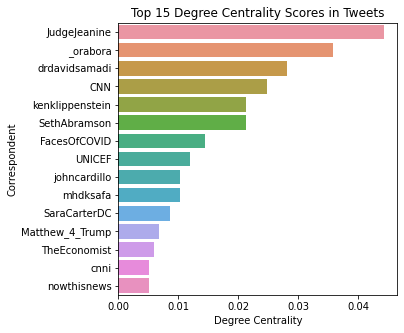

In [32]:
# Top Influential users
cent = nx.degree_centrality(G_rt)
name = []
centrality = []

# Iterating
for key, value in cent.items():
    name.append(key)
    centrality.append(value)

cent = pd.DataFrame()
cent['name'] = name
cent['centrality'] = centrality
cent = cent.sort_values(by= 'centrality', ascending=False)

# Creating plot 
plt.figure(figsize=(5, 5))
_ = sns.barplot(x='centrality', y='name', data=cent[:15], orient='h')
_ = plt.xlabel('Degree Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Degree Centrality Scores in Tweets')
plt.show()

JudgeJeannine, orabora, drdavidsamadi and CNN are the top most influential users among the network. Next we will see betweenness centrality which measures the degree to which each node is the 'single point of contact', it means between other nodes or cliques. 

# Betweenness Centrality

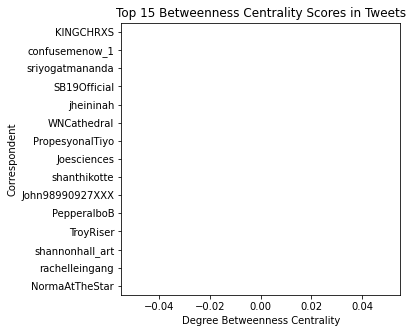

In [43]:
between = nx.betweenness_centrality(G_rt)
name = []
betweenness = []

for key, value in between.items():
    name.append(key)
    betweenness.append(value)

bet = pd.DataFrame()
bet['name'] = name
bet['betweenness'] = betweenness
bet = bet.sort_values(by='betweenness', ascending=False)


plt.figure(figsize=(5,5))
_ = sns.barplot(x='betweenness', y='name', data=bet[:15], orient='h')
_ = plt.xlabel('Degree Betweenness Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Betweenness Centrality Scores in Tweets')
plt.show()

As we said, it measures the number of times a node lies on the shortest path between other nodes. It shows which nodes are 'bridges' between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one. Unfortunately, due to high number of nodes and limited access to tweets (n=1000) there is no bridge between nodes in a network but it is very useful fore finding the individuals who influence the flow around a system.

Let's move ahead and calculate closeness of centrality. It scores each node based on their closeness to all other nodes in the network.

# Closeness of Centrality

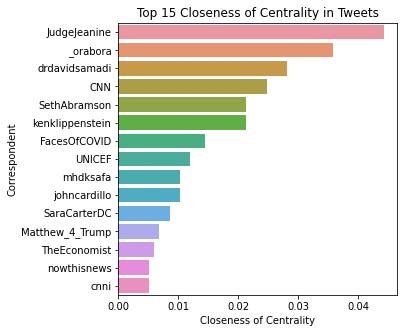

In [46]:
close = nx.closeness_centrality(G_rt)
name = []
closeness = []

for key, value in close.items():
    name.append(key)
    closeness.append(value)

clo = pd.DataFrame()
clo['name'] = name
clo['closeness'] = closeness
clo = clo.sort_values(by='closeness', ascending=False)


plt.figure(figsize=(5,5))
_ = sns.barplot(x='closeness', y='name', data=clo[:15], orient='h')
_ = plt.xlabel('Closeness of Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Closeness of Centrality in Tweets')
plt.show()

Closeness centrality calculates the shortest paths between all nodes. It is very useful to find the individuals who are best placed to influence the entire network quickly. It helps finding 'broadcasters' but in a highly connected network, you will often find all nodes have a similar score.  What may be more useful is using closeness to find influencers in a single cluster